# ML Homework 2023
Valentina Margiotta (225401) 
Sara Resta (225418)

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import scipy
from scipy.stats import t
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *

Importing the datasets. We have three datasets:
- online_shoppers: the complete dataset
- training_set: subset of online_shoppers used for training
- test_set: subset of online_shoppers used for test

In [3]:
online_shoppers = pd.read_csv("data/online_shoppers_intention.csv")
training_set = pd.read_csv("data/training_set_online_shoppers_intention.csv")
test_set = pd.read_csv("data/test_set_online_shoppers_intention.csv")

## 1. PRELIMINARY ANALYSIS AND REGRESSION ALGORITHMS

For this first exercise we use the training set, which is composed of 9248 rows and 19 columns. Columns are dataset attributes and include both categorical and numerical variables.
* 9 numerical variables + "ExitRates"
* 7 categorical variables + "Revenue"
* 1 useless variable, "Unnamed: 0"

In [4]:
training_set = training_set.drop(columns=['Unnamed: 0'])
training_set.head()
training_set.shape

Administrative  Administrative_Duration  Informational  \
0               0                 0.000000              0   
1               5               158.700000              0   
2               7                87.916667              1   
3               1                 4.000000              0   
4               2               132.400000              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               5                19.000000   
1                     0.0              51              1364.266667   
2                     0.0              46              1621.025379   
3                     0.0              37              1296.942857   
4                     0.0              11               296.300000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0     0.000000   0.080000    0.000000         0.6   May                 2   
1     0.007692   0.011987    0.000000         0.0   Nov                 3   
2     0.004082   0.020544    6.023523         0.0   Dec                 1   
3     0.013889        NaN    0.000000         0.8   May                 2   
4     0.000000        NaN    0.000000         0.0   Sep                 2   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        2       1            3  Returning_Visitor    False    False  
1        2       3            2  Returning_Visitor     True    False  
2        1       3            2  Returning_Visitor    False    False  
3        2       4            2  Returning_Visitor    False    False  
4        4       3            2        New_Visitor    False    False

(9248, 18)

Assign "categorical" to type of categorical variables.

In [5]:
online_shoppers['Month']=online_shoppers['Month'].astype('category')
online_shoppers['OperatingSystems']=online_shoppers['OperatingSystems'].astype('category')
online_shoppers['Browser']=online_shoppers['Browser'].astype('category')
online_shoppers['Region']=online_shoppers['Region'].astype('category')
online_shoppers['TrafficType']=online_shoppers['TrafficType'].astype('category')
online_shoppers['VisitorType']=online_shoppers['VisitorType'].astype('category')
online_shoppers['Weekend']=online_shoppers['Weekend'].astype('category')
online_shoppers['Revenue']=online_shoppers['Revenue'].astype('category')

Assign a chronological order to "Month" variable.

In [6]:
month_order = ['Feb', 'Mar', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_order = pd.Categorical(online_shoppers['Month'], categories=month_order, ordered=True)
online_shoppers['Month'] = month_order.sort_values()

Creation of two objects, one containing all the categorical variables and one containing the numerical ones.

In [7]:
df_cat = pd.DataFrame({'Month':online_shoppers['Month'],
                       'OperatingSystems':online_shoppers['OperatingSystems'],
                       'Browser':online_shoppers['Browser'],
                       'Region':online_shoppers['Region'],
                       'TrafficType':online_shoppers['TrafficType'],
                       'VisitorType':online_shoppers['VisitorType'],
                       'Weekend':online_shoppers['Weekend'],
                       'Revenue':online_shoppers['Revenue']})
df_num = pd.DataFrame({'Administrative':online_shoppers['Administrative'],
                   'Administrative_Duration':online_shoppers['Administrative_Duration'],
                   'Informational':online_shoppers['Informational'],
                   'Informational_Duration':online_shoppers['Informational_Duration'],
                   'ProductRelated':online_shoppers['ProductRelated'], 
                   'ProductRelated_Duration':online_shoppers['ProductRelated_Duration'],
                   'BounceRates':online_shoppers['BounceRates'], 
                   'ExitRates':online_shoppers['ExitRates'],
                   'PageValues':online_shoppers['PageValues'], 
                   'SpecialDay':online_shoppers['SpecialDay']})

## 1.1 Dataset inspection

We check if there's any NA value and we see there aren't NA vlaues.

In [8]:
# Check for NA values
np.sum(online_shoppers.isna())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [9]:
df_cat.describe()

Month  OperatingSystems  Browser  Region  TrafficType  \
count   12330             12330    12330   12330        12330   
unique     10                 8       13       9           20   
top       May                 2        2       1            2   
freq     3364              6601     7961    4780         3913   

              VisitorType Weekend Revenue  
count               12330   12330   12330  
unique                  3       2       2  
top     Returning_Visitor   False   False  
freq                10551    9462   10422

In [10]:
df_num.describe()

Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               184.137500   
50%                  0.000000       18.000000               598.936905   
75%                  0.000000       38.000000              1464.157214   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues    SpecialDay  
count  12330.000000  12330.000000  12330.000000  12330.000000  
mean       0.022191      0.043073      5.889258      0.061427  
std        0.048488      0.048597     18.568437      0.198917  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.014286      0.000000      0.000000  
50%        0.003112      0.025156      0.000000      0.000000  
75%        0.016813      0.050000      0.000000      0.000000  
max        0.200000      0.200000    361.763742      1.000000

We do some visual inspection on categorical variables.

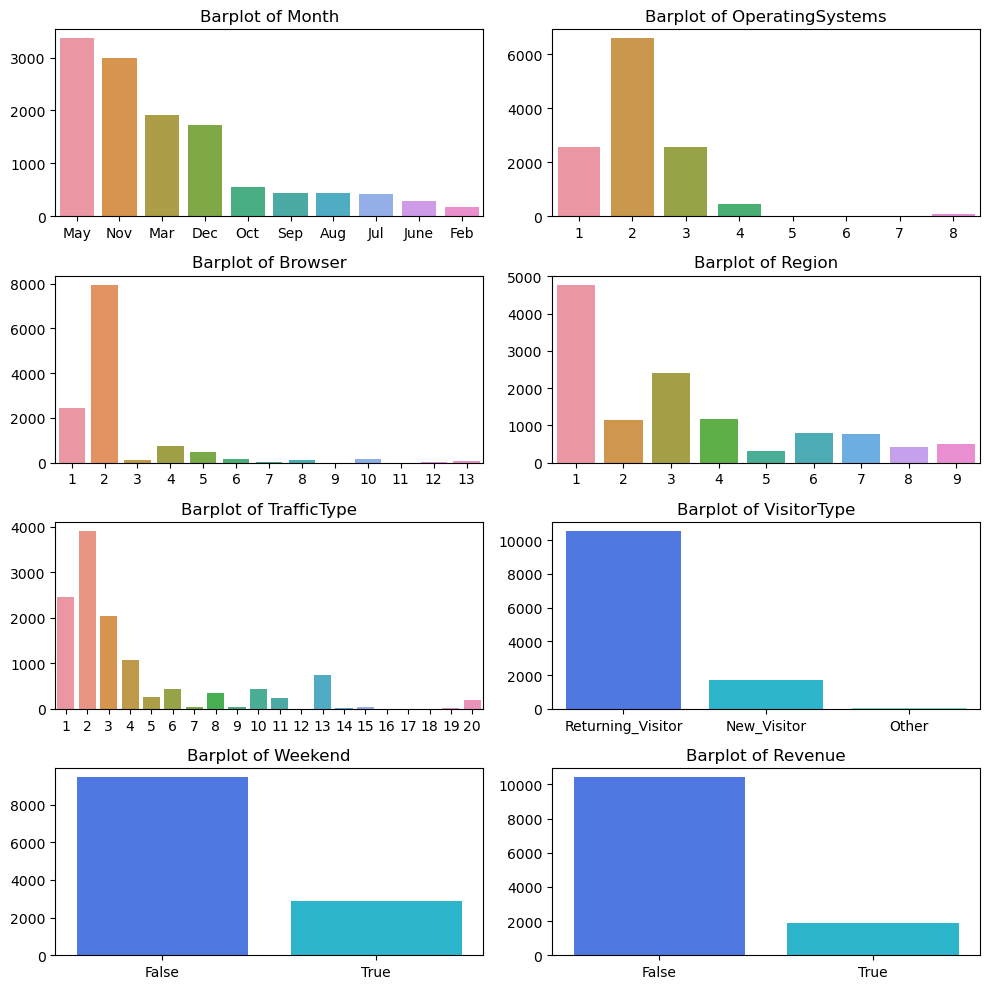

In [19]:
sns.set_palette("rainbow")
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 10))

for cat in enumerate(df_cat):
    i, cat = cat
    sns.barplot(x=list(df_cat["{}".format(cat)].value_counts().index), 
            y=list(df_cat["{}".format(cat)].value_counts().values), data=df_cat, ax=axes[i//2, i%2])
    axes[i // 2, i % 2].set_title("Barplot of {}".format(cat))

plt.tight_layout()
plt.show();

We do some inspection about numerical variables

In [57]:
#sns.set_palette("darkblue")
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 10))

for num in enumerate(df_num):
    i, num = num
    sns.histplot(data=df_num, x=num, ax=axes[i//2, i%2], color="darkblue")
    axes[i // 2, i % 2].set_title("Histogram of {}".format(num))

plt.tight_layout()
plt.show();

We want to know which are the most correlated variables with the target class and if there is any correlation between the variables.
We start considering if there is a correlation between some variables

We firstly check if there is any correlation by printing the heatmap. The most correlated variables are:
* Administrative, Administrative_Duration
* Informational, Informational_Duration
* ProductRelated, ProductRelated_Duration
* BounceRates, ExitRates

In [22]:
sns.heatmap(online_shoppers.corr())

<AxesSubplot:>

Now we print a scatterplot for the pairs of variables for which we found a correlation. From these scatterplots it seems that ProductRelated and ProductRelated_Duration have a linear relation, the same can be said for BouceRates and ExitRates.

In [55]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

sns.scatterplot(data=df_num, x=list(df_num['Administrative']), y=list(df_num['Administrative_Duration']), 
                ax = axes[0, 0], color='darkblue')
axes[0, 0].set_xlabel('Administrative')
axes[0, 0].set_ylabel('Administrative_Duration')

sns.scatterplot(data=df_num, x=list(df_num['Informational']), y=list(df_num['Informational_Duration']), 
                ax = axes[0, 1], color='darkblue')
axes[0, 1].set_xlabel('Informational')
axes[0, 1].set_ylabel('Informational_Duration')

sns.scatterplot(data=df_num, x=list(df_num['ProductRelated']), y=list(df_num['ProductRelated_Duration']), 
                ax = axes[1, 0], color='darkblue')
axes[1, 0].set_xlabel('ProductRelated')
axes[1, 0].set_ylabel('ProductRelated_Duration')

sns.scatterplot(data=df_num, x=list(df_num['BounceRates']), y=list(df_num['ExitRates']), 
                ax = axes[1, 1], color='darkblue')
axes[1, 1].set_xlabel('BounceRates')
axes[1, 1].set_ylabel('ExitRates')

<AxesSubplot:>

Text(0.5, 0, 'Administrative')

Text(0, 0.5, 'Administrative_Duration')

<AxesSubplot:>

Text(0.5, 0, 'Informational')

Text(0, 0.5, 'Informational_Duration')

<AxesSubplot:>

Text(0.5, 0, 'ProductRelated')

Text(0, 0.5, 'ProductRelated_Duration')

<AxesSubplot:>

Text(0.5, 0, 'BounceRates')

Text(0, 0.5, 'ExitRates')

We compute the covariance matrix for the continuous variables

In [ ]:
# DA VEDERE


cont = online_shoppers[["Administrative", "Administrative_Duration", "Informational", "Informational_Duration", 
                        "ProductRelated", "ProductRelated_Duration", "BounceRates", "ExitRates", "PageValues", "SpecialDay"]]
cov_matrix = np.cov(cont, rowvar=False)
np.diag(cov_matrix) # vettore delle varianze
np.var(online_shoppers[["Administrative_Duration"]])

In [ ]:
# DA DECIDERE!! POTREBBE ESSERE UNA COSA UTILE


#boxplot a continuos variable and consider if it has outliers and everything: 
continuos = ['Administrative', 'Administrative_Duration', 'Informational',
             'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
             'BounceRates', 'ExitRates', 'PageValues']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
plt.subplots_adjust(hspace=0.4)

for i, name in enumerate(continuos):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.boxplot(data=total_df, x="Revenue", y=name, ax=ax)
    ax.set_title("Boxplot of {}".format(name))

plt.tight_layout()
plt.show();
    

DOMANDE PER NOI!
- What about analisi incentrata su revenue? Con attenzioni sui boxplot di cui il codice è riportato appena sopra
- La heatmap la devo fare con Spearman?
- Faccio analisi su coefficienti rho?
- Quali correlazioni sono significative? Questo lo farei, ma poi forse dovremmo anche chiederci cosa facciamo una volta che abbiamo delle correlazioni significative
- Cramer correlation? Io non lo farei, ma magari c'è un modo visivo per cercare correlazioni tra le categoriche
- Correlazione con exit rates secondo me utile da fare! Come? Scatterplot? Anche se potremmo liquidare la cosa guardando e commentando la heatmap e i p-values dei coefficienti di correlazione.
- Io forse visualizzerei le distribuzioni delle continue. Forse questo si vede già dagli istogrammi. Allora forse dovremmo fare un commento sul fatto che nessuna è normale e che tutte sono incentrate su sinistra.
- Poi, gli istogrammi a me sembrano identici a quelli di fra e simo, ma loro plottano solo i valori positivi di revenue. Ha senso?
- Loro fanno anche istogramma delle continue, ma secondo me i nostri barplot bastano.